In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv(r'/content/data_diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
594,6,123,72,45,230,33.6,0.733,34,No
595,0,188,82,14,185,32.0,0.682,22,Yes
596,0,67,76,0,0,45.3,0.194,46,No
597,1,89,24,19,25,27.8,0.559,21,No
598,1,173,74,0,0,36.8,0.088,38,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               599 non-null    int64  
 1   Glucose                   599 non-null    int64  
 2   BloodPressure             599 non-null    int64  
 3   SkinThickness             599 non-null    int64  
 4   Insulin                   599 non-null    int64  
 5   BMI                       599 non-null    float64
 6   DiabetesPedigreeFunction  599 non-null    float64
 7   Age                       599 non-null    int64  
 8   Outcome                   599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
x = data.drop ('Outcome', axis = 1)
y = data['Outcome']

In [ ]:
x.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [ ]:
y.head(10)

,Outcome
0,Yes
1,No
2,Yes
3,No
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(max_iter=1000, tol=1e-3),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
model_performance = {
    'model' : [],
    'accuracy' : [],
    'precision' : [],
    'recall' : []
}

In [ ]:
def train_evaluate_model(model_name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall


In [ ]:
for model_name, model in models.items():
    accuracy, precision, recall = train_evaluate_model(
        model_name, model, x_train, y_train, x_test, y_test
    )
    model_performance['model'].append(model_name)
    model_performance['accuracy'].append(accuracy)
    model_performance['precision'].append(precision)
    model_performance['recall'].append(recall)

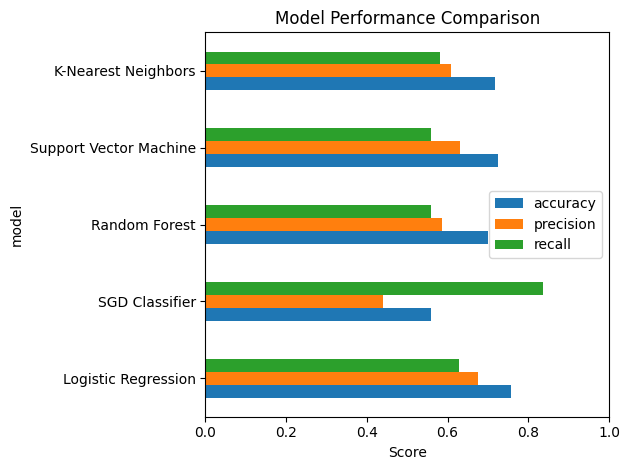

In [ ]:
performance_df = pd.DataFrame(model_performance)
performance_df.plot(kind='barh', x='model', y=['accuracy', 'precision', 'recall'],
                    xlim=(0,1), title='Model Performance Comparison')
plt.xlabel('Score')
plt.tight_layout()
plt.show()